In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data[:,[2,3]] #for any row use column 3 and 4

y = iris.target

print(np.unique(y)) # The class names Iris-setosa, Iris-versicolor, and Iris-virginica are stored as integer for technical and memory issues



[0 1 2]


In [2]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state= 42, stratify=y) #stratify make sure all data are proportional using Y

print(np.bincount(y_test))# Counting the number of the Y tests

[15 15 15]


In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train) # Trying to fing propeer scaler i.e std deviation and mean for the X _train values

X_train_std = sc.transform(X_train)

X_test_std = sc.transform(X_test)

print(X_train_std, X_train)






[[-0.4419858  -0.13661044]
 [ 0.40282929  0.38029394]
 [-1.2868009  -1.17041921]
 [ 1.19132338  1.41410271]
 [ 0.17754527  0.12184175]
 [ 0.79707634  1.41410271]
 [-1.2868009  -1.4288714 ]
 [-1.23047989 -1.29964531]
 [-1.3431219  -1.29964531]
 [ 1.19132338  1.15565051]
 [ 0.74075533  1.02642442]
 [-1.3431219  -1.29964531]
 [-1.23047989 -1.29964531]
 [ 0.40282929  0.38029394]
 [ 0.00858225 -0.13661044]
 [ 1.24764439  0.76797223]
 [-1.23047989 -1.04119311]
 [-1.23047989 -1.29964531]
 [ 1.07868137  1.6725549 ]
 [ 0.57179231  0.76797223]
 [-1.2868009  -1.04119311]
 [ 0.62811332  0.76797223]
 [ 1.58557043  1.15565051]
 [ 1.64189143  1.02642442]
 [ 0.23386627 -0.00738435]
 [-1.3431219  -1.17041921]
 [-1.2868009  -1.04119311]
 [-1.39944291 -1.04119311]
 [ 0.62811332  0.38029394]
 [ 0.12122426  0.12184175]
 [-1.2868009  -1.04119311]
 [-1.3431219  -1.17041921]
 [ 0.17754527 -0.26583654]
 [-0.10405976  0.12184175]
 [-1.3431219  -1.4288714 ]
 [-1.3431219  -1.17041921]
 [ 0.34650829  0.25106784]
 

In [4]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0= 0.1, random_state= 1)

ppn.fit(X_train_std,y_train)


Perceptron(eta0=0.1, random_state=1)

In [5]:
y_pred = ppn.predict(X_test_std)

print(f"The total sum of errors are:{(y_pred!=y_test).sum()} ")
print(y_pred)
print(y_test)

The total sum of errors are:5 
[1 1 1 1 2 2 1 1 0 2 0 0 2 2 0 2 0 0 0 0 1 0 1 2 2 1 1 0 1 0 1 2 1 0 2 0 0
 0 0 1 1 0 2 2 1]
[2 1 2 1 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 2 1 1 1 1 0 2 2 1 0 2 0 0
 0 0 1 1 0 2 2 1]


In [6]:
#Calculating the errors;
from sklearn.metrics import accuracy_score

print("The accuracy score is the %.3f" % accuracy_score(y_test,y_pred))

The accuracy score is the 0.889


In [20]:
from matplotlib.colors import ListedColormap 
import matplotlib.pyplot as plt

def plot_decision_regiona(X,y, classifier, test_idx = None, resolution = 0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ("red","blue","green","cyan","gray")

    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max, resolution),
                           np.arange(x2_min,x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha = 0.3, cmap= cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())


    for idx, cl in enumerate (np.unique(y)):
        plt.scatter(x = X[y == cl,0],
                   y = X[y == cl,1] , alpha = 0.8, c = colors[idx], marker = markers[idx], label = f"Class {cl}", edgecolors= "black")

    if test_idx:
        x_test = X[test_idx,:]  
        y_test = X[test_idx]
    plt.scatter(x_test[:,0],
                x_test[:,1],
                c = 'none',
                marker = "o",
                alpha = 1,
                linewidths=1,
                s = 100,
                label = "test case"
                )


    

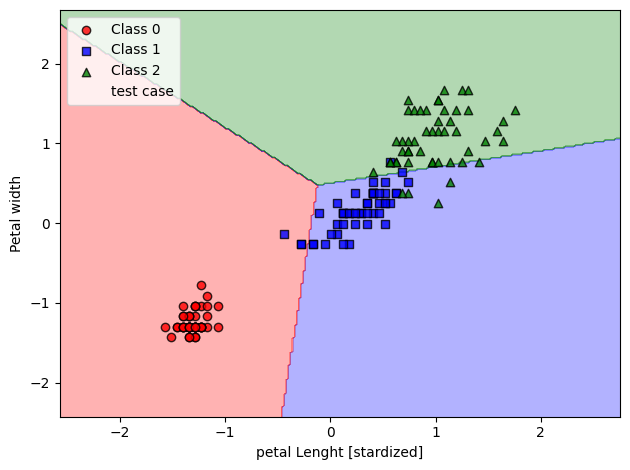

In [21]:
x_combined = np.vstack((X_test_std,X_train_std))
y_combined = np.hstack((y_test,y_train))

plot_decision_regiona(X = x_combined,y =  y_combined, classifier= ppn, test_idx= range(105,150))

plt.xlabel("petal Lenght [stardized]")
plt.ylabel("Petal width")
plt.legend(loc = "upper left")
plt.tight_layout()

plt.show()